In [1]:
import pyBigWig
import pandas as pd
import sys
sys.path.append('/home/hsher/rbp-maps/maps/')
from density.ReadDensity import ReadDensity
import os
from waveform import *
from pybedtools import BedTool
import matplotlib.pyplot as plt
from code_profile import timer

basedir = '/home/hsher/seqdata/eclip_raw/' # HepG2
neg = basedir + 'ENCFF891BFD.bigWig'
pos = basedir + 'ENCFF930WRN.bigWig'
bam = basedir + 'ENCFF162FHQ.bam'
HNRNPC = ReadDensity(pos, neg, bam = bam, name = 'HNRNPC')
HNRNPC_uid = 203

neg = basedir + 'ENCFF494CVZ.bigWig' #HepG2
pos = basedir + 'ENCFF078NBU.bigWig'
bam = basedir + 'ENCFF553XCL.bam'
HNRNPK = ReadDensity(pos, neg, bam = bam, name = 'HNRNPK')
HNRNPK_uid = 206

neg = basedir + 'ENCFF766RBQ.bigWig' #HepG2
pos = basedir + 'ENCFF984MNA.bigWig'
bam = basedir + 'ENCFF959SXJ.bam'
RPS3 = ReadDensity(pos, neg, bam = bam, name = 'RPS3')
RPS3_uid = 540

neg = basedir + 'ENCFF376NMQ.bigWig'
pos = basedir + 'ENCFF142OTS.bigWig'
bam = basedir + 'ENCFF896PKL.bam' #K562
RPS11 = ReadDensity(pos, neg, bam = bam, name = 'RPS11')
RPS11_uid = 614

in_dir = '/home/hsher/seqdata/eclip_bed/sorted/' # sorted and merged peaks
HNRNPC_idr = BedTool(in_dir + str(HNRNPC_uid)+'.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed')
HNRNPK_idr = BedTool(in_dir + str(HNRNPK_uid)+'.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed')
RPS3_idr = BedTool(in_dir + str(RPS3_uid)+'.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed')
RPS11_idr = BedTool(in_dir + str(RPS11_uid)+'.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed')

# how many IDR peaks
print(len(HNRNPC_idr), len(HNRNPK_idr), len(RPS3_idr), len(RPS11_idr))

# some RBP are very sad

2938 5033 4533 32


In [2]:
def get_raw_density(key_transcript, read_density):
    all_spect = []
    ids = []
    if len(key_transcript) < 500:
        sample = len(key_transcript)
    else:
        sample = 500
    for i in range(sample):
        chro = key_transcript[i].chrom
        start = int(key_transcript[i].start)
        end = int(key_transcript[i].stop)
        strand = key_transcript[i].strand
    
        shape = read_density.values(chro, start-50, end+50, strand)
        
        if strand == '-':
            shape = [-s for s in shape]
        
        shape = np.nan_to_num(shape, 0)
        all_spect.append(shape)
        ids.append((chro, start, end, strand))
        i+= 1
        
    return all_spect, ids

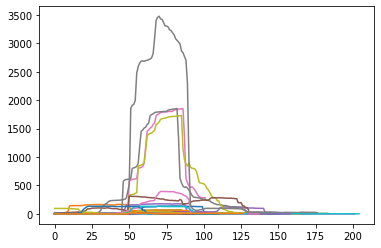

In [3]:
all_RPS11, id_RPS11 = get_raw_density(RPS11_idr, RPS11)
for peak in all_RPS11:
    plt.plot(peak)

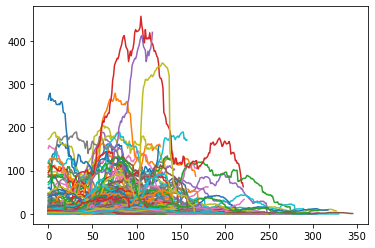

In [5]:
all_RPS11, id_RPS11 = get_raw_density(RPS3_idr, RPS3)
for peak in all_RPS11:
    plt.plot(peak)

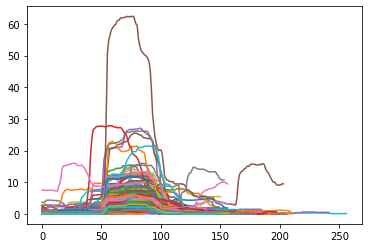

In [7]:
all_HNRNPC, id_HNRNPC = get_raw_density(HNRNPC_idr, HNRNPC)
for peak in all_HNRNPC:
    plt.plot(peak)

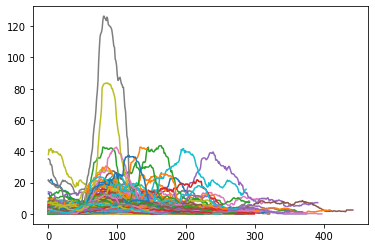

In [8]:
all_HNRNPK, id_HNRNPK = get_raw_density(HNRNPK_idr, HNRNPK)
for peak in all_HNRNPK:
    plt.plot(peak)